In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [2]:
df = pd.read_csv("D:\AI Engineer Training\Python_Coding\Week_22_Logistics_Regression_Assignment\Social_Network_Ads.csv")
df.head()



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.shape

(400, 5)

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
#Check for missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

print("Predicted class labels for test data:")
print(y_pred)
print("\nPredicted probabilities for test data:")
print(y_prob)


Predicted class labels for test data:
[0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0
 1 0 1 1 0 0]

Predicted probabilities for test data:
[[0.63144951 0.36855049]
 [0.00696355 0.99303645]
 [0.97760682 0.02239318]
 [0.05889725 0.94110275]
 [0.9847338  0.0152662 ]
 [0.93261993 0.06738007]
 [0.04886054 0.95113946]
 [0.8853728  0.1146272 ]
 [0.46393861 0.53606139]
 [0.44702422 0.55297578]
 [0.79845054 0.20154946]
 [0.18035121 0.81964879]
 [0.99148384 0.00851616]
 [0.99834635 0.00165365]
 [0.84062936 0.15937064]
 [0.42979255 0.57020745]
 [0.1913475  0.8086525 ]
 [0.18721661 0.81278339]
 [0.79510814 0.20489186]
 [0.03922467 0.96077533]
 [0.99696547 0.00303453]
 [0.89660801 0.10339199]
 [0.5677808  0.4322192 ]
 [0.01101951 0.98898049]
 [0.99887013 0.00112987]
 [0.34628903 0.65371097]
 [0.3118382  0.6881618 ]
 [0.79989074 0.20010926]
 [0.00415332 0.99584668]
 [0.99877958 0.00122042]
 [0.4514

In [11]:
# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[46  6]
 [ 4 24]]


In [12]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8750


In [13]:
# Precision Score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.8000


In [14]:
#Recall Score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")


Recall: 0.8571


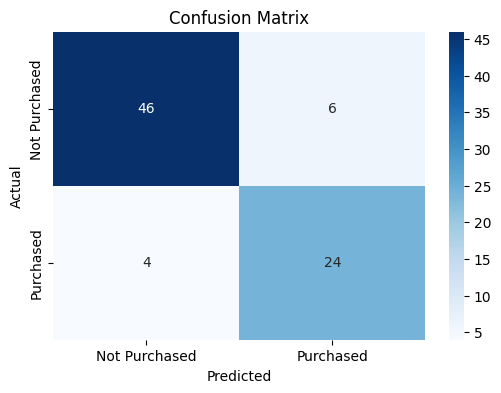

In [15]:
# Plot confusion matrix using matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()  


**Why is Logistic Regression suitable for this problem?**

Logistic Regression is suitable because the target variable (Purchased) is binary (0 or 1). Logistic Regression is designed for classification tasks where the outcome is categorical, especially binary classification.

**What does Precision indicate in a business context?**

Precision measures the proportion of positive predictions that are actually correct. In business, high precision means that when the model predicts a customer will purchase, it is usually correct—reducing false positives.

**What does Recall indicate in a business context?**

Recall measures the proportion of actual positives that are correctly identified. In business, high recall means the model successfully identifies most customers who will purchase—reducing false negatives.

**If Precision is high but Recall is low, what does it mean?**

It means the model is very accurate when it predicts a positive (purchase), but it misses many actual positives. In other words, it is conservative in predicting purchases, so it rarely makes mistakes, but it also fails to identify many potential buyers.